# visualization

> Necessary scripts to visualize orbits

In [1]:
#| default_exp visualize

In [2]:
#| export
from nbdev.showdoc import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# What is an orbit?

We consider an orbit to be an array of Escalars x Time stampts

Escalars: 6 elements= posX, posY, posZ, velX, velY, velZ

Time stamps: L elements= t0, t1, .... , t

In [3]:
from orbit_generation_testing.reader import get_example_h5_data, get_example_mat_data

In [4]:
#h5_data= get_example_h5_data()
#h5_data.shape

In [5]:
mat_data= get_example_mat_data()
mat_data.shape

(300, 6, 200)

In [6]:
#| export
def visualize_orbits_static(data, orbit_indices=None, show_legend=False):
    """
    Visualize orbits in 3D for data organized as (num_time_points, 6, num_orbits).
    Now with adjustable figure size, interactive rotation, and optional legend.

    :param data: Numpy array of shape (num_time_points, 6, num_orbits)
    :param orbit_indices: Optional; List of indices of the orbits to visualize
    :param show_legend: Optional; Boolean indicating whether to show the legend
    """
    # Adjust the figure size here
    fig = plt.figure(figsize=(10, 8))  # Example size: 10 inches by 8 inches
    ax = fig.add_subplot(111, projection='3d')

    num_orbits = data.shape[2]
    if orbit_indices is None:
        orbit_indices = range(num_orbits)  # Default to all orbits

    for index in orbit_indices:
        if index < 0 or index >= num_orbits:
            print(f"Orbit index {index} is out of range.")
            continue

        X = data[:, 0, index]  # X coordinates
        Y = data[:, 1, index]  # Y coordinates
        Z = data[:, 2, index]  # Z coordinates

        ax.plot(X, Y, Z, label=f'Orbit {index}')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('3D Orbits Visualization')
    
    # Show the legend only if show_legend is True
    if show_legend:
        ax.legend()

    plt.show()

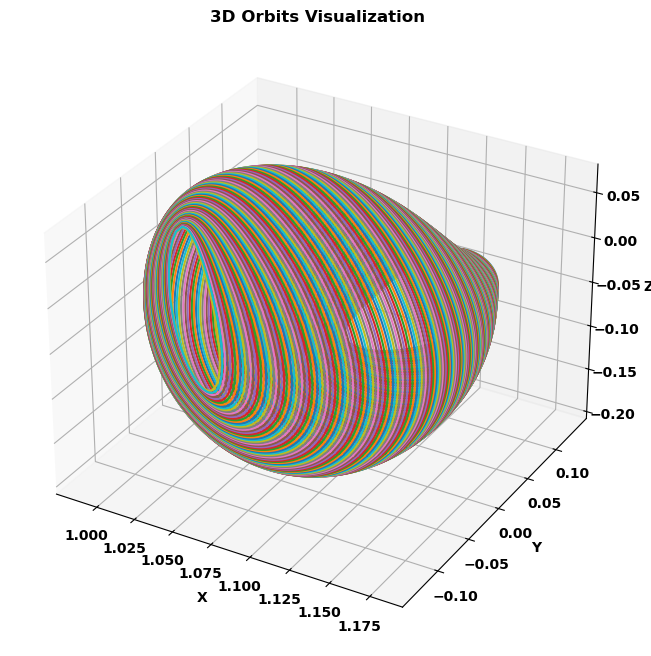

In [7]:
visualize_orbits_static(mat_data, orbit_indices=None)

In [8]:
#| export
def visualize_dynamic_orbits_html(data, orbit_indices=None, filename='orbits.html', point_dict=None):
    """
    Visualize orbits in 3D and save as an interactive HTML file with a clickable legend, for data organized as (num_time_points, 6, num_orbits).
    Also includes the option to add named points to the visualization.

    :param data: Numpy array of shape (num_time_points, 6, num_orbits)
    :param orbit_indices: Optional; List of indices of the orbits to visualize
    :param filename: String, name of the file to save the HTML plot
    :param point_dict: Optional; Dictionary where keys are point names and values are the 3D coordinates of the points
    """
    num_orbits = data.shape[2]
    if orbit_indices is None:
        orbit_indices = range(num_orbits)  # Default to all orbits

    fig = go.Figure()

    # Plot each orbit
    for index in orbit_indices:
        if index < 0 or index >= num_orbits:
            print(f"Orbit index {index} is out of range.")
            continue

        X = data[:, 0, index]  # X coordinates
        Y = data[:, 1, index]  # Y coordinates
        Z = data[:, 2, index]  # Z coordinates

        fig.add_trace(go.Scatter3d(x=X, y=Y, z=Z, mode='lines',
                                   name=f'Orbit {index}',
                                   legendgroup=f'orbit{index}',
                                   showlegend=True))

    # Add points from the point_dict if provided
    if point_dict is not None:
        for point_name, coords in point_dict.items():
            fig.add_trace(go.Scatter3d(x=[coords[0]], y=[coords[1]], z=[coords[2]], mode='markers',
                                       marker=dict(size=5),
                                       name=point_name))

    fig.update_layout(title='3D Orbits Visualization',
                      scene=dict(xaxis_title='X',
                                 yaxis_title='Y',
                                 zaxis_title='Z'),
                      width=800, height=600,
                      legend_title="Orbits Legend",
                      clickmode='event+select')

    fig.write_html(filename)
    print(f"Visualization saved to {filename}")

In [ ]:
mu = 0.0122
points_to_add={
    'Moon': (1-mu,0,0),
    'Earth': (-mu,0,0),
    'Lagrange 1': (0.8369,0,0),
    'Lagrange 2': (1.1557,0,0)
}

In [9]:
#visualize_dynamic_orbits_html(mat_data, orbit_indices=None, filename='orbits.html', point_dict=None)

Visualization saved to orbits.html


In [10]:
#| hide
import nbdev; nbdev.nbdev_export()